## Simple MNIST Classifier Model for Edge Demo



In [26]:

from tqdm import tqdm
import numpy as np
import os
from configparser import ConfigParser
import keras

from keras import backend as K
print(keras.backend.backend())
import os
print(K)
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

#print(os.environ['KERAS_BACKEND'])

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from __future__ import print_function
import importlib
import sys
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K, threading, json, re, collections
import tarfile, tensorflow as tf, matplotlib.pyplot as plt, operator, random, pickle, glob, os
import shutil, sklearn, functools, itertools, scipy

from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors, LSHForest
import IPython
from IPython.display import display, Audio
from numpy.random import normal



tensorflow
<module 'keras.backend' from 'C:\\Users\\pattyry\\AppData\\Local\\Continuum\\anaconda3\\envs\\myenv\\lib\\site-packages\\keras\\backend\\__init__.py'>


In [27]:
###############################
# Set Working Directory 
###############################
import os
cwd = os.getcwd()
print(cwd)
path = '/AMLonEDGE'
os.chdir(path)
print(cwd)
base_dir = '/AMLonEDGE'
Data = os.path.join('/AMLonEDGE/', 'SampleImages')

print(Data)

C:\AMLonEDGE\SampleImages
C:\AMLonEDGE\SampleImages
/AMLonEDGE/SampleImages


In [28]:
###############################
# Attach blob storage account 
###############################
# identify the storage account

#from azure.storage.blob import BlockBlobService
#block_blob_service = BlockBlobService(account_name='yourstorageaccountnamehere', account_key='youraccountkeyhere')

from azure.storage.blob import BlockBlobService
block_blob_service = BlockBlobService(account_name='pattyryblobdwr', account_key='2mhPHMs0LLXMRbFBBo+wvRR+jG7ZMC7VWWthMVM2u4QzWLsy3MAKQh174rGe1MUTrhpe8Uo61HpDiUTNRXoynQ==')
print('block_blob_service storage account attached')

print(block_blob_service.list_blobs('modelserviceprojects'))

inputlist = []
listgenerator = block_blob_service.list_blobs('modelservicesourceimages')
for blob in listgenerator:
    inputlist.append(blob.name) 
print(len(inputlist))
print(inputlist)



block_blob_service storage account attached
6
['cam_2_20180613_105829_116.jpg', 'cam_2_20180613_110019_228.jpg', 'cam_2_20180613_110045_540.jpg', 'cam_2_20180613_110107_395.jpg', 'cam_2_20180613_110123_253.jpg', 'cam_2_20180613_110140_453.jpg']


In [29]:
import sklearn
from sklearn.datasets import fetch_mldata

In [30]:
mnist = fetch_mldata('MNIST original')

In [31]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [32]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


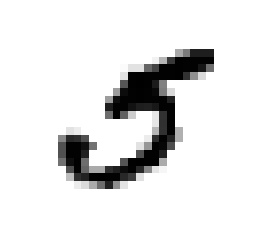

In [33]:
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

In [35]:
##############################
#Training a Binary Classifier
##############################

y_train_5 = (y_train == 5 )
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)


C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [36]:
###########################
# Scoring & Perf Measures
###########################

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol wi

array([0.962  , 0.9631 , 0.96505])

In [37]:
#############################
# More Performance Measures
#############################

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)


for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
  
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.962


C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9631


C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96505


In [38]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
result = confusion_matrix(y_train_5, y_train_pred)
result

C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol wi

array([[53501,  1078],
       [ 1119,  4302]], dtype=int64)

C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\pattyry\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol wi

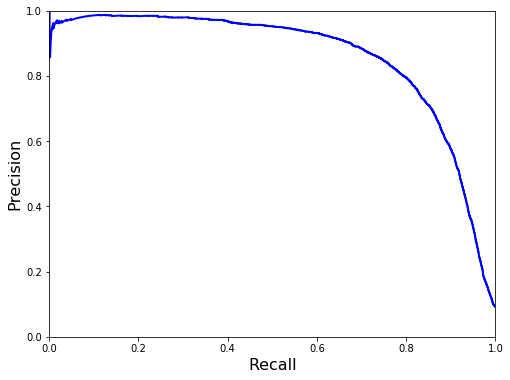

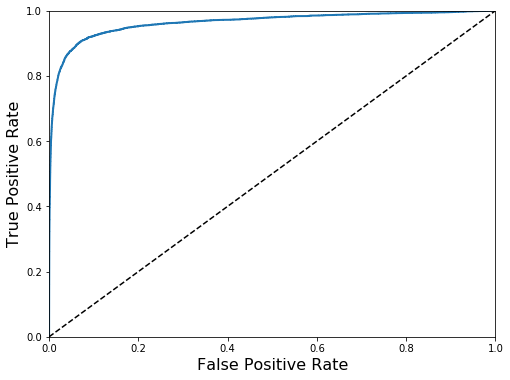

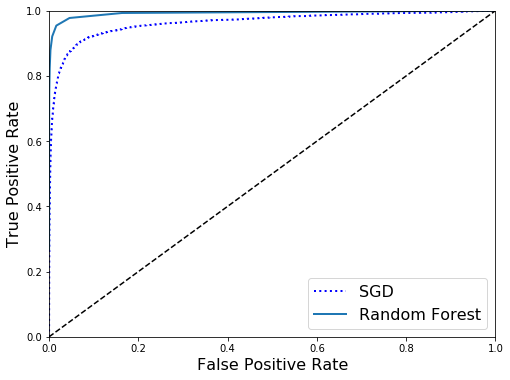

0.9926311228942846

In [39]:

result[1][1]/(result[0][1]+result[1][1])
precision_score(y_train_5, y_train_pred)

result[1][1]/(result[1][0]+result[1][1])
recall_score(y_train_5, y_train_pred)

f1_score(y_train_5, y_train_pred)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

In [40]:

import pickle

forest_clf_fit = forest_clf.fit(X_train,y_train_5)

 
# pickle number classification model
FiveorNoFive_MNIST_Model_filename = 'Five_Binary_Class_Model_pickle.pkl'
 
# Open the file to save as pkl file
FiveorNoFive_pickle = open(FiveorNoFive_MNIST_Model_filename, 'wb')
s = pickle.dump(forest_clf_fit, FiveorNoFive_pickle)
FiveorNoFive_pickle.close()




Loaded Decision tree model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
[ True]


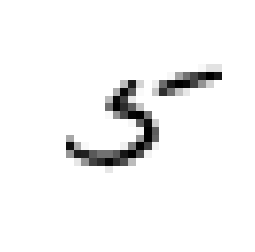

In [41]:

FiveorNoFive_MNIST_Model_filename = 'Five_Binary_Class_Model_pickle.pkl'
model_pickle = open(FiveorNoFive_MNIST_Model_filename, 'rb')
model = pickle.load(model_pickle)
print("Loaded Decision tree model :: ", model)

some_test_digit = X_test[5810]
some_test_digit_reshape = some_test_digit.reshape(1, -1)
output = model.predict(some_test_digit_reshape)
print(output)

some_test_digit1 = some_test_digit.reshape(28,28)
plt.imshow(some_test_digit1, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


## Reduce size, color and resolution of sample image to model size

In [42]:
print(inputlist)
print(os.getcwd())

os.chdir(Data)
print(os.getcwd())

['cam_2_20180613_105829_116.jpg', 'cam_2_20180613_110019_228.jpg', 'cam_2_20180613_110045_540.jpg', 'cam_2_20180613_110107_395.jpg', 'cam_2_20180613_110123_253.jpg', 'cam_2_20180613_110140_453.jpg']
C:\AMLonEDGE
C:\AMLonEDGE\SampleImages


original image size is (640, 480)


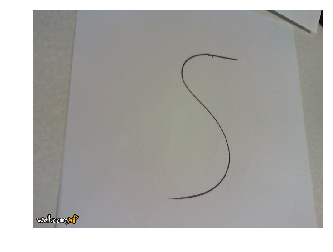

grey scale size is (640, 480)
foo size is (640, 480)


In [43]:
#conversion to smaller size
from PIL import Image
 
# My image is a 200x374 jpeg that is 102kb large
foo = Image.open("cam_2_20180613_110045_540.jpg")
print('original image size is',foo.size)

plt.imshow(foo, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

img = Image.open("cam_2_20180613_110045_540.jpg").convert('LA')
img.save('greyscale.png')
print('grey scale size is', img.size)
#conversion to smaller size
from PIL import Image
 
# My image is a 200x374 jpeg that is 102kb large
foo = Image.open("greyscale.png")
print('foo size is',foo.size)
 
# I downsize the image with an ANTIALIAS filter (gives the highest quality)
img2 = foo.resize((28,28),Image.ANTIALIAS)
img2.save("smallgreyscale.png",optimize=True,quality=95)

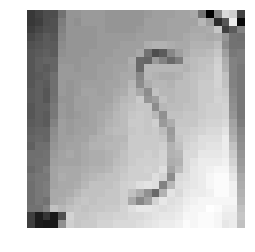

In [44]:
img = Image.open("smallgreyscale.png").convert("L")

#convert to numpy array, invert and reshape to target image size
img = np.array(img)
img = np.invert(img)
img = img.reshape(28,28)


#show the image
plt.imshow(img, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


#img_as_np = np.asarray(foo2.getdata()).reshape(foo2.size[1], foo2.size[0], -1)

In [45]:

img = Image.open("smallgreyscale.png").convert("L")
arr = np.array(img)
print(arr.shape)
arr2 = arr.reshape(1, -1)
print(arr2.shape)

(28, 28)
(1, 784)


In [46]:
output = model.predict(arr2)
print(output)

[False]


In [47]:
def init():
    global model
    # note here "best_model.pkl" is the local file in the current directory
    model_path = get_model_path('Five_Binary_Class_Model_pickle.pkl')
    model = joblib.load(model_path)

# note you can pass in multiple rows for scoring
def run(raw_data):
    try:
        data = json.loads(raw_data)['data']
        data = numpy.array(data)
        result = model.predict(data)
    except Exception as e:
        result = str(e)
    return json.dumps({"result": result.tolist()})

In [48]:




#Multiclass classification

#sgd_clf.fit(X_train, y_train)
#sgd_clf.predict([some_digit])
#sgd_clf.decision_function([some_digit])
#sgd_clf.classes_
#np.argmax(sgd_clf.decision_function([some_digit]))
#cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

#from sklearn.multiclass import OneVsOneClassifier

#ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
#ovo_clf.fit(X_train, y_train)
#ovo_clf.predict([some_digit])

#len(ovo_clf.estimators_)

#forest_clf.fit(X_train, y_train)
#forest_clf.predict([some_digit])
#forest_clf.predict_proba([some_digit])

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')

#Error Analysis

#y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

#conf_mx = confusion_matrix(y_train, y_train_pred)
#conf_mx

#row_sums = conf_mx.sum(axis=1, keepdims=True)
#norm_conf_mx = conf_mx / row_sums
#np.fill_diagonal(norm_conf_mx, 0)
#plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#plt.show()

#Multilabel classification

#from sklearn.neighbors import KNeighborsClassifier

#y_train_large = (y_train >= 7)
#y_train_odd = (y_train % 2 == 1)
#y_multilabel = np.c_[y_train_large, y_train_odd]

#knn_clf = KNeighborsClassifier()
#knn_clf.fit(X_train, y_multilabel)
#knn_clf.predict([some_digit])

#Multioutput classification

#noise = rnd.randint(0, 100, (len(X_train), 784))
#X_train_mod = X_train + noise
#noise = rnd.randint(0, 100, (len(X_test), 784))
#X_test_mod = X_test + noise
#y_train_mod = X_train
#y_test_mod = X_test

#some_index = 5500
#plt.subplot(121); plot_digit(X_test_mod[some_index])
#plt.subplot(122); plot_digit(y_test_mod[some_index])
#plt.show()

#knn_clf.fit(X_train_mod, y_train_mod)
